# Paso 1 - Tener claro nuestro objetivo.
El primer paso en la creación de nuestro sistema de predicción no es otro que tener claro que queremos lograr con él, y de que disponemos para lograrlo.
<br>

**OBJETIVO** --> Crear un sistema de predicción que nos permita saber si una persona está o no en riesgo de sufrir un ataque cardíaco.

Para lograrlo, disponemos que un conjunto de de datos que almacena información sobre una serie personas, como son:
<br>
- **Edad**
- **Anemia**. Si el paciente sufre anemia (booleano)
- **Niveles de CPK**.   Nivel de la enzima CPK en sangre (mcg/L)
- **Diabético**. Si el paciente sufre diabetes (booleano)
- **Fracción de eyección**. Porcentaje de sangre que sale del corazón con cada latido (porcentaje)
- **Hipertensión**. Si el paciente sufre de hipertensión (booleano)
- **Plaquetas**. Nivel de plaquetas en sangre (kiloplaquetas/mL)
- **Creatinina**. Nivel de creatinina en la sangre (mg/dL)
- **Sodio**. Nivel de sodio en la sangre (mEq/L)
- **Género**. Sexo de la persona (booleano)
- **Fumador**. La persona es fumadora o no (booleano)
- **Seguimiento**. Número de días de seguimiento
- **Muerte confirmada**. Ha muerto la persona durante el seguimiento? (booleano)

# Paso 2

**Importación de módulos** necesarios para la creación del sistema de predicción.


In [3]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# Una vez hemos importado todos los módulos a usar, debemos importar el archivo csv
# y crear un df del mismo con la ayuda de pandas.
archivo_clinico_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [5]:
# Es importante destacar que el atributo "sex" hace referencia al genero de la persona.
# Si es mujer, la columna contendrá un 0; si es hombre, contendrá un 1.
archivo_clinico_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
# Con esta linea de código podemos ver dos datos importantes:
   # - El csv contiene un total de 298 lineas, es decir, 298 personas en el estudio.
   # - Los datos de las personas (o las filas del csv) no están almacenados siguiendo algún
   # orden, lo que nos deja libertad para organizarlo a nuestro gusto.
archivo_clinico_df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


<AxesSubplot:>

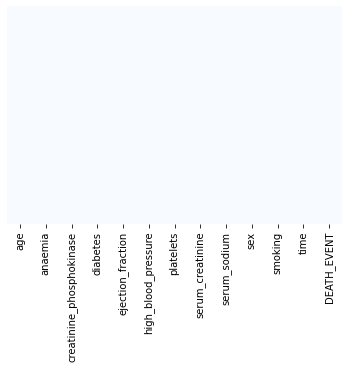

In [7]:
# Aunque no debería en este conjunto, siempre es necesario analizar si existen valores nulos en nuestro csv.
# En caso afirmativo, deberiamos intervenir para evitar irregularidades en las estimaciones de nuestro modelo.

sns.heatmap(archivo_clinico_df.isnull(), yticklabels= False, cbar = False, cmap = 'Blues')

In [8]:
# Como podemos ver, nuestro archivo csv no contiene valores nulos, por lo que no va a ser necesaria
# nuestra intervencion.

In [9]:
archivo_clinico_df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
archivo_clinico_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'anaemia'}>,
        <AxesSubplot:title={'center':'creatinine_phosphokinase'}>,
        <AxesSubplot:title={'center':'diabetes'}>],
       [<AxesSubplot:title={'center':'ejection_fraction'}>,
        <AxesSubplot:title={'center':'high_blood_pressure'}>,
        <AxesSubplot:title={'center':'platelets'}>,
        <AxesSubplot:title={'center':'serum_creatinine'}>],
       [<AxesSubplot:title={'center':'serum_sodium'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'smoking'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'DEATH_EVENT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

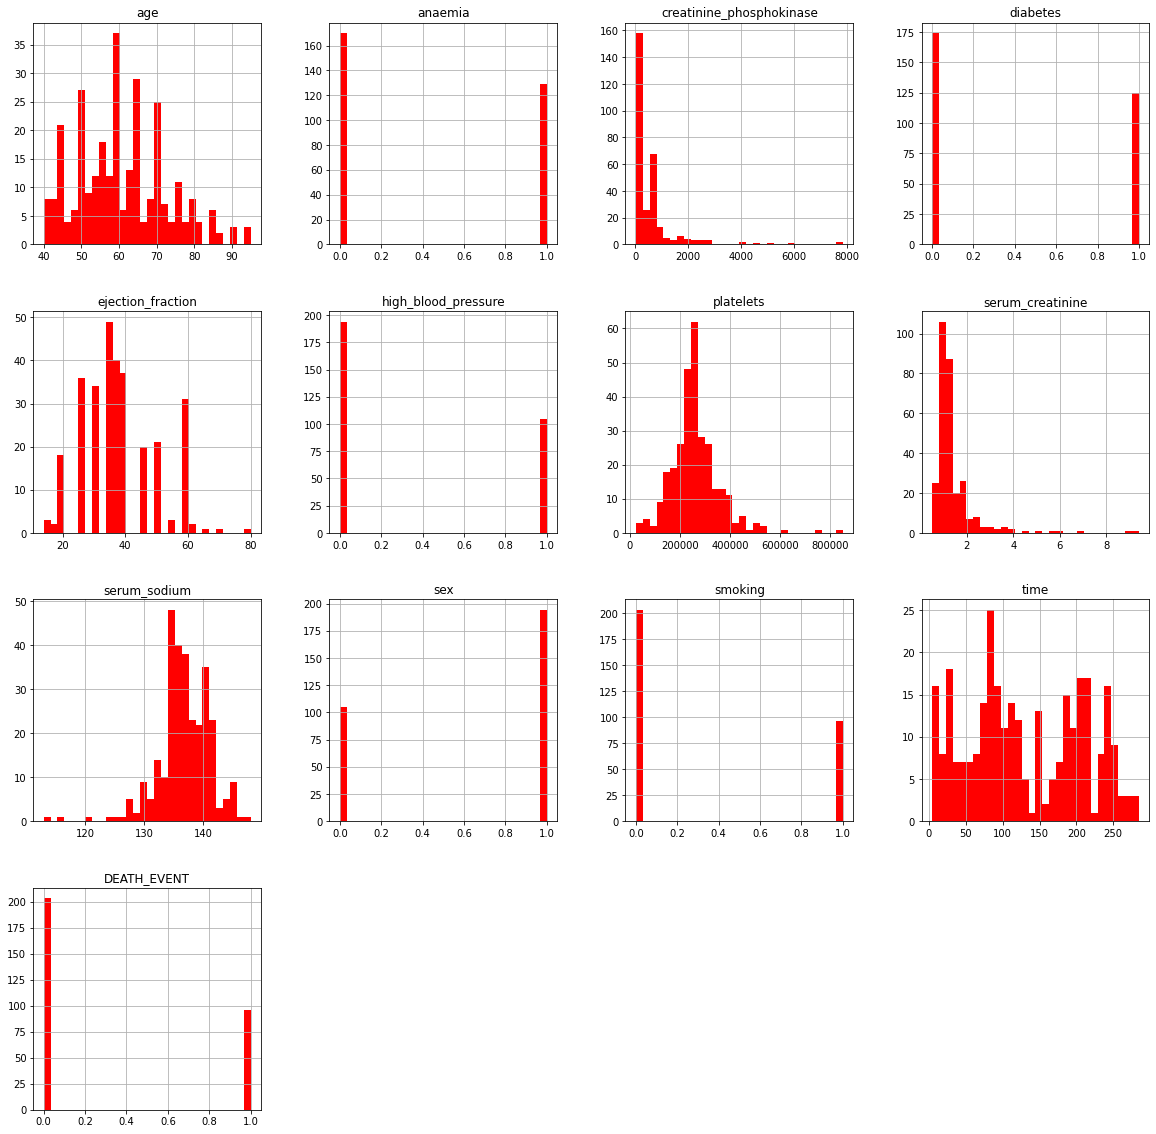

In [11]:
# A continuación, procedemos a visualizar nuestro conjunto de datos, haciendo uso de matplotlib.

archivo_clinico_df[['age',
                    'anaemia',
                    'creatinine_phosphokinase',
                    'diabetes',
                    'ejection_fraction',
                    'high_blood_pressure',
                    'platelets',
                    'serum_creatinine',
                    'serum_sodium',
                    'sex',
                    'smoking',
                    'time',
                    'DEATH_EVENT']].hist(bins = 30, figsize = (20,20), color = 'r')

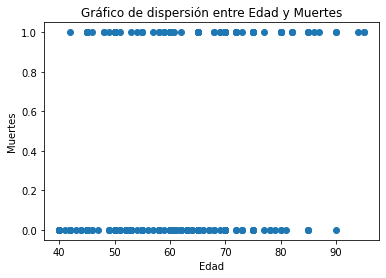

In [12]:
# Crear un gráfico de dispersión
plt.scatter(archivo_clinico_df['age'], archivo_clinico_df['DEATH_EVENT'])

# Agregar etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Muertes')
plt.title('Gráfico de dispersión entre Edad y Muertes')

# Mostrar el gráfico
plt.show()

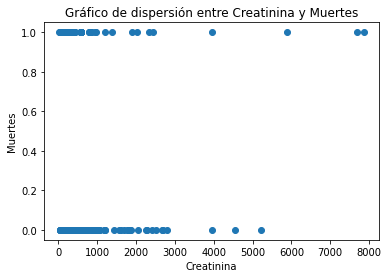

In [13]:
# Crear un gráfico de dispersión
plt.scatter(archivo_clinico_df['creatinine_phosphokinase'], archivo_clinico_df['DEATH_EVENT'])

# Agregar etiquetas y título
plt.xlabel('Creatinina')
plt.ylabel('Muertes')
plt.title('Gráfico de dispersión entre Creatinina y Muertes')

# Mostrar el gráfico
plt.show()

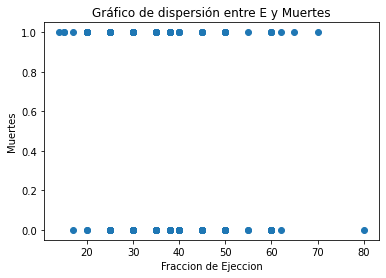

In [14]:
# Crear un gráfico de dispersión
plt.scatter(archivo_clinico_df['ejection_fraction'], archivo_clinico_df['DEATH_EVENT'])

# Agregar etiquetas y título
plt.xlabel('Fraccion de Ejeccion')
plt.ylabel('Muertes')
plt.title('Gráfico de dispersión entre E y Muertes')

# Mostrar el gráfico
plt.show()

In [15]:
# Una vez visualizado nuestro conjunto de datos, procedemos a dividir nuestro conjunto de datos en:
# - Conjunto de entrenamiento.
# - Conjunto de validación.
# - Conjunto de prueba.

# Este paso es VITAL, pues tenemos que evitar que nuestro modelo memorice los datos. Esto ocurriria en el caso
# de no hacer ninguna division, pues el modelo se entrenaria con los mismos datos con lo que se evaluaría su
# rendimiento, por lo que nos expondríamos a un sobreajuste (overfitting) del modelo.


In [90]:
# Separamos los atributos y la etiqueta del conjunto de datos:

X = archivo_clinico_df.drop(columns = ['anaemia','diabetes','high_blood_pressure','sex','smoking','time','DEATH_EVENT'])
y = archivo_clinico_df['DEATH_EVENT']

In [91]:
# Como nuestra red reuronal trabaja con arrays, vamos a convertir los dataframe X e y a arrays de Numpy

X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [92]:
# Dividir el conjunto de datos en un conjunto de entrenamiento y un conjunto de prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.2)


In [93]:
X_entrenamiento.shape

(239, 6)

In [94]:
X_prueba.shape

(60, 6)

In [95]:
y_entrenamiento.shape

(239,)

In [96]:
y_prueba.shape

(60,)

In [97]:
y_entrenamiento = y_entrenamiento.reshape(-1, 1)

In [98]:
y_prueba = y_prueba.reshape(-1,1)

In [99]:
y_entrenamiento.shape

(239, 1)

In [100]:
# Definir la arquitectura del modelo
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(6,)),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [103]:
# Entrenar el modelo
model.fit(X_entrenamiento, y_entrenamiento, epochs=100, verbose = False)

In [104]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(X_prueba, y_prueba)

print("Puntuación de pérdida (loss): {}".format(test_loss))
print("Puntuacion de exactitud (accuracy): {}".format(test_acc))




2/2 [==============================] - 0s 10ms/step - loss: 0.0000e+00 - accuracy: 0.6333
Puntuación de pérdida (loss): 0.0
Puntuacion de exactitud (accuracy): 0.6333333253860474
